## Step 1 - Packages

In [34]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sys

print(f"Python version -> {sys.version}")  # 3.12.3
print(f"Tensorflow version -> {tf.__version__}")  # 2.20
print(f"sklearn version -> {sklearn.__version__}")  # 1.7.1
print(f"numpy version -> {np.__version__}")  # 2.3.2

Python version -> 3.12.3 (main, Aug 14 2025, 17:47:21) [GCC 13.3.0]
Tensorflow version -> 2.20.0
sklearn version -> 1.7.1
numpy version -> 2.3.2


## Step 2 - MNIST Data

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print("x_train : ", x_train.shape)
print("y_train : ", y_train.shape)
print("x_test  : ", x_test.shape)
print("y_test  : ", y_test.shape)
type(x_train), type(y_test)

x_train :  (60000, 28, 28, 1)
y_train :  (60000,)
x_test  :  (10000, 28, 28, 1)
y_test  :  (10000,)


(numpy.ndarray, numpy.ndarray)

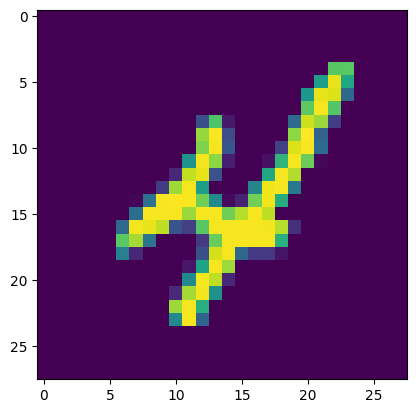

In [57]:
plt.imshow(x_train[9])

In [58]:
y_train[9]

np.uint8(4)

## Step 3 - Preparing the data

In [4]:
print("Before normalization : Min={}, max={}".format(x_train.min(), x_train.max()))

xmax = x_train.max()
x_train = x_train / xmax
x_test = x_test / xmax

print("After normalization  : Min={}, max={}".format(x_train.min(), x_train.max()))

Before normalization : Min=0, max=255
After normalization  : Min=0.0, max=1.0


## Step 4 - Create model

In [5]:
model = keras.models.Sequential()

In [6]:
model

<Sequential name=sequential, built=False>

In [ ]:
# Specify input
model.add(keras.layers.Input((28, 28, 1)))

# Conv layer + maxpool + dropout
model.add(keras.layers.Conv2D(8, (8, 8), activation="relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.2))

# Conv layer + maxpool + dropout
model.add(keras.layers.Conv2D(16, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.2))

# Flatten and fully connected layer + dropout
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dropout(0.5))

# Output layer with fully connected + softmax
model.add(keras.layers.Dense(10, activation="softmax"))

In [61]:
model.summary()

model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 21, 21, 8)      │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 10, 10, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 10, 10, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 16)       │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        25,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,398 (110.93 KB)

 Trainable params: 28,398 (110.93 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
score = model.evaluate(x_test, y_test, verbose=0)

print(f"Test loss     (before training) : {score[0]:4.4f}")
print(f"Test accuracy (before training): {score[1]:4.4f}")

Test loss     (before training) : 2.3140
Test accuracy (before training): 0.1372


## Step 5 - Train the model

In [63]:
batch_size = 512
epochs = 16

history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test),
)

Epoch 1/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6511 - loss: 1.0678 - val_accuracy: 0.9375 - val_loss: 0.2329
Epoch 2/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8909 - loss: 0.3611 - val_accuracy: 0.9582 - val_loss: 0.1396
Epoch 3/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9200 - loss: 0.2674 - val_accuracy: 0.9685 - val_loss: 0.1064
Epoch 4/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9341 - loss: 0.2223 - val_accuracy: 0.9724 - val_loss: 0.0888
Epoch 5/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9421 - loss: 0.1957 - val_accuracy: 0.9753 - val_loss: 0.0769
Epoch 6/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9487 - loss: 0.1709 - val_accuracy: 0.9791 - val_loss: 0.0670
Epoch 7/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9528 - loss: 0.1580 - val_accuracy: 0.9808 - val_loss: 0.0621
Epoch 8/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9559 - loss: 0.1485 - val_accuracy: 0

## Step 6 - Evaluate

In [64]:
score = model.evaluate(x_test, y_test, verbose=0)

print(f"Test loss     (after training): {score[0]:4.4f}")
print(f"Test accuracy (after training): {score[1]:4.4f}")

Test loss     (after training): 0.0393
Test accuracy (after training): 0.9868


In [65]:
y_softmax = model.predict(x_test)
y_pred = np.argmax(y_softmax, axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [66]:
errors = [i for i in range(len(x_test)) if y_pred[i] != y_test[i]]

In [67]:
print(confusion_matrix(y_test, y_pred))  # order matters! (actual, predicted)

[[ 974    0    2    0    0    0    2    1    1    0]
 [   0 1131    1    0    0    0    1    2    0    0]
 [   1    2 1026    0    0    0    0    3    0    0]
 [   0    0    4  993    0    8    0    2    3    0]
 [   0    0    0    1  972    0    2    1    1    5]
 [   2    0    0    5    0  881    1    1    1    1]
 [   7    3    0    0    1    1  946    0    0    0]
 [   1    3    9    4    0    0    0 1009    1    1]
 [   3    1    3    1    1    1    2    3  954    5]
 [   2    3    0    2    8    3    0    6    3  982]]


In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

